In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Write the spectra we're interested in downloading to txt file

seyferts = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.csv').head(10)
file = '/Users/kciurleo/Documents/kciurleo/AGN/queries/SDSS.txt'

with open(file, 'w') as f:
    for i in range(len(seyferts)):
        row = seyferts.iloc[i]
        f.write(f"{int(row['PLATE']):04d}/spec-{int(row['PLATE']):04d}-{int(row['MJD']):04d}-{int(row['FIBERID']):04d}.fits\n")




In [10]:
#  Read in fits
hdul = fits.open('/Users/kciurleo/Downloads/spec-3661-55614-0020.fits')
spectrum_data = hdul[1].data
header = hdul[1].header
hdul.close()

flux = spectrum_data['FLUX'].flatten()
wavelength = 10**spectrum_data['loglam'].flatten()

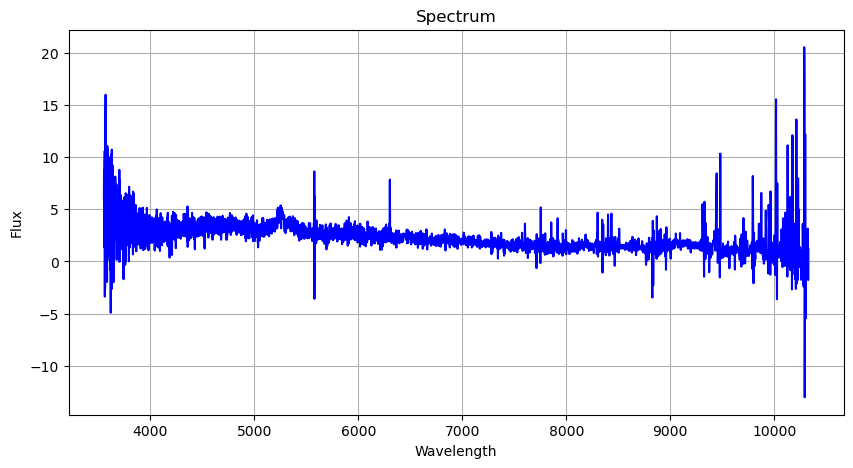

In [12]:
#Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, linestyle='-', color='b')
#plt.yscale('log')
plt.title('Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.grid(True)
plt.show()

In [9]:
header['DISPAXIS']=1